# **House Prices - Advanced Regression Techniques**

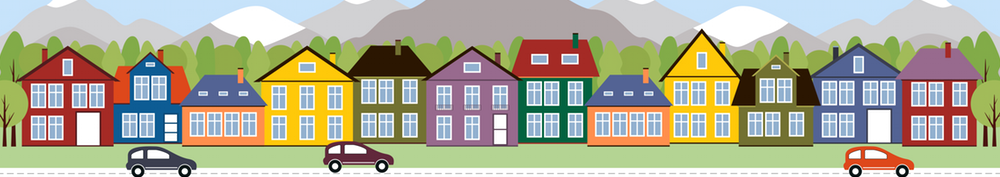

In [1]:
from IPython.display import Image
Image('housesbanner.png')

In [2]:
from data import Data
import pandas as pd

In [3]:
dataframe = Data()

## ** Analyzing the shape of the data **

In [4]:
df = dataframe.read_original_data('test.csv')

In [5]:
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


### *Champs de données*
 
Voici une brève description des données.

*SalePrice:le prix de vente de la propriété en dollars. C'est la variable cible à prédire.

*OverallQual: Qualité globale du matériau et de la finition

*LotArea : Taille du lot en pieds carrés

*TotalBsmtSF : superficie totale en pieds carrés du sous-sol

*GrLivArea : Surface habitable au -dessus du sol en pieds carrés

*TotRmsAbvGrd : Nombre total de chambres au-dessus du niveau du sol (n'inclut pas les salles de bains)

*Fonctionnel : évaluation de la fonctionnalité de la maison

*GarageArea : Superficie du garage en pieds carrés

*MoSold : Mois vendu

*YrSold : Année Vendu

*SaleType : Type de vente

*VenteCondition : Condition de vent

In [6]:
dataframe.analys_form_dataframe(df)

-------------------------------------------------------------------------------
-------------------- The dataframe's shape: (1459, 80)
-------------------------------------------------------------------------------
-------------------- Info. dataframe
-------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null

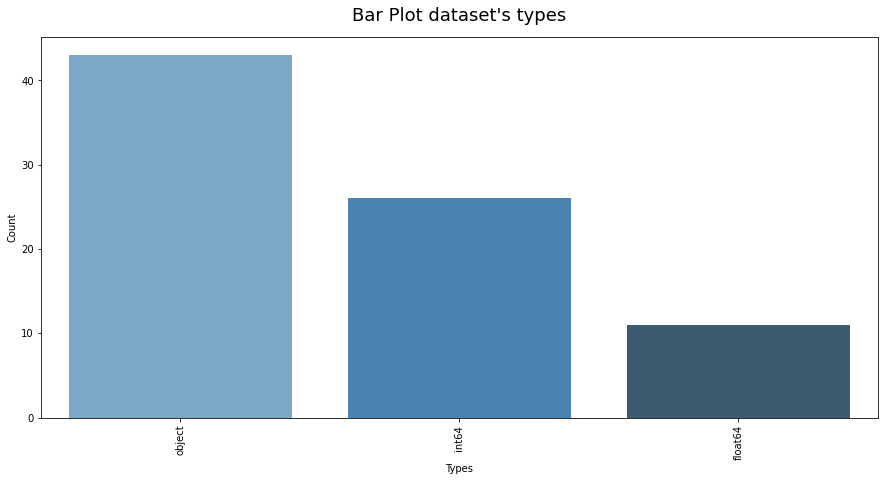

In [7]:
dataframe.plot_dataset_types(df)

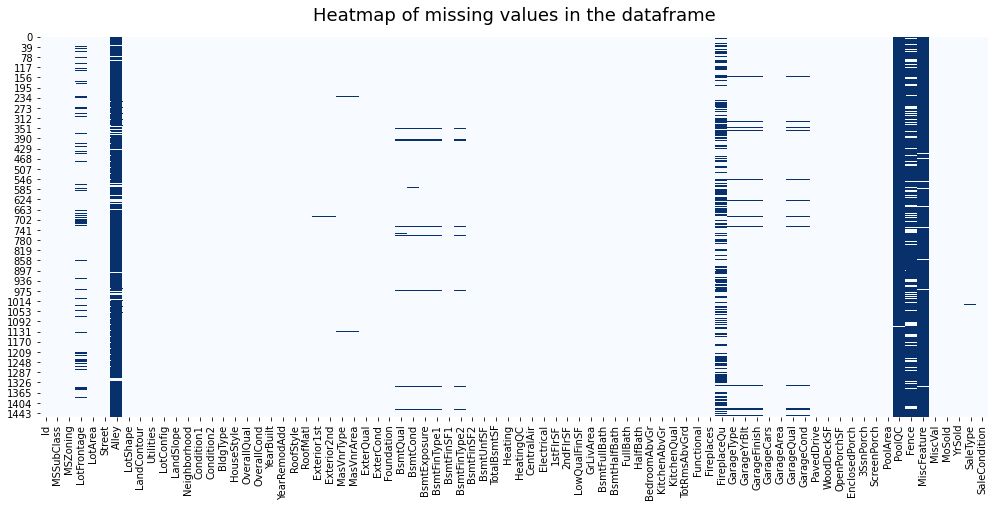

In [8]:
dataframe.show_map_missing_values(df)

In [9]:
dataframe.calculate_missing_values(df)

-------------------------------------------------------------------------------
-------------------- Calculate missing values in the dataframe
-------------------------------------------------------------------------------


Id             0.000000
Foundation     0.000000
HeatingQC      0.000000
CentralAir     0.000000
Electrical     0.000000
                 ...   
FireplaceQu    0.500343
Fence          0.801234
Alley          0.926662
MiscFeature    0.965045
PoolQC         0.997944
Length: 80, dtype: float64

## ** Cleaning Data **

### *DELETE unnecessary columns with 80% or more of missing values*

In [10]:
house_prices_data = df.copy()

In [11]:
# REMOVE unnecessary columns
house_prices_data = dataframe.delet_features_having_more_then_80_per_cent_miss_values(house_prices_data)

### *OBSERVE our database a second time & FIND other solutions to deal with missing values*

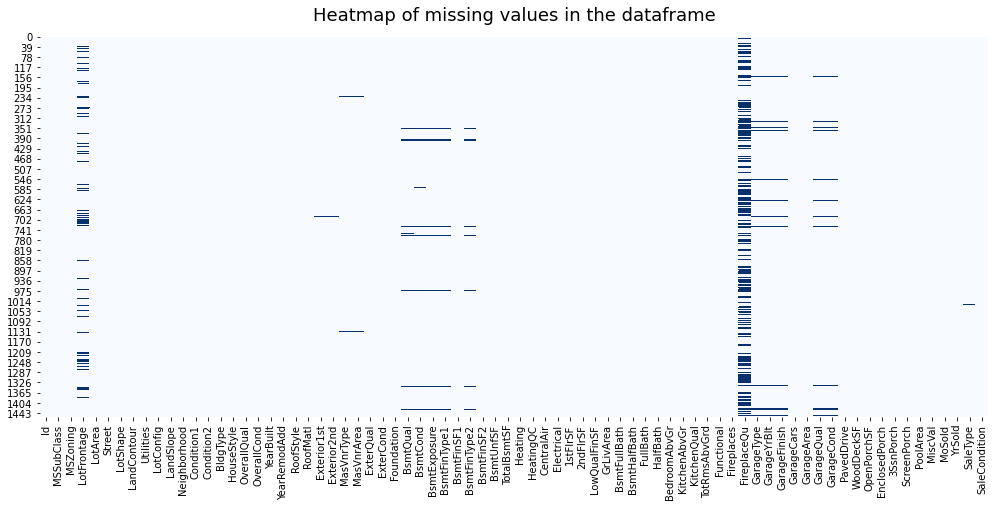

In [12]:
dataframe.show_map_missing_values(house_prices_data)

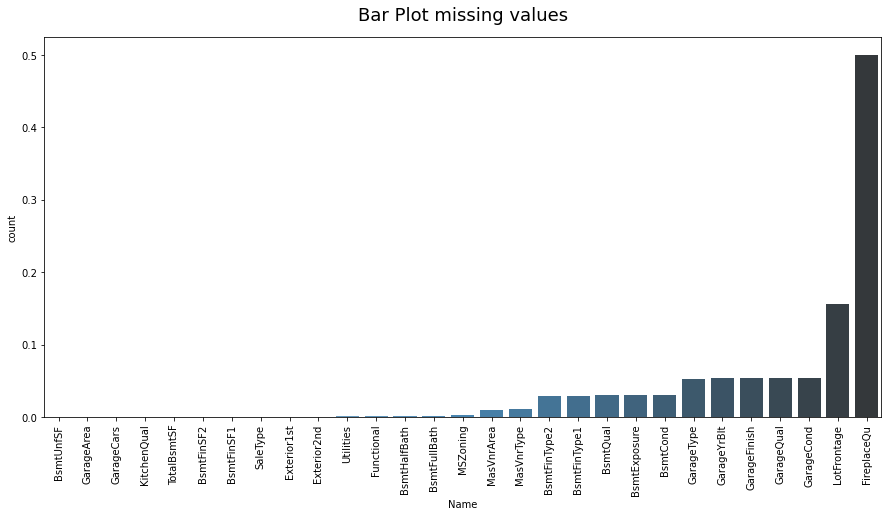

In [13]:
dataframe.plot_missing_values(house_prices_data)

### *ANALYZE unique value counts of each column*

#### *ANALYZE unique missing values of each column*

In [14]:
dataframe.missing_value_counts_df(house_prices_data)

-------------------------------------------------------------------------------
 Count missing values of each column
-------------------------------------------------------------------------------
False    1455
True        4
Name: MSZoning, dtype: int64
----------------------------------------
False    1232
True      227
Name: LotFrontage, dtype: int64
----------------------------------------
False    1457
True        2
Name: Utilities, dtype: int64
----------------------------------------
False    1458
True        1
Name: Exterior1st, dtype: int64
----------------------------------------
False    1458
True        1
Name: Exterior2nd, dtype: int64
----------------------------------------
False    1443
True       16
Name: MasVnrType, dtype: int64
----------------------------------------
False    1444
True       15
Name: MasVnrArea, dtype: int64
----------------------------------------
False    1415
True       44
Name: BsmtQual, dtype: int64
----------------------------------------
False

#### *ANALYZE unique values of each column*

In [15]:
dataframe.value_counts_all_columns_df(house_prices_data)

2047    1
2526    1
2528    1
2529    1
2530    1
       ..
1563    1
1564    1
1565    1
1566    1
2048    1
Name: Id, Length: 1459, dtype: int64

-----------------------------------------

20     543
60     276
50     143
120     95
30      70
70      68
160     65
80      60
90      57
190     31
85      28
180      7
75       7
45       6
40       2
150      1
Name: MSSubClass, dtype: int64

-----------------------------------------

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

-----------------------------------------

60.0     133
80.0      68
70.0      63
50.0      60
75.0      52
        ... 
22.0       1
136.0      1
149.0      1
31.0       1
131.0      1
Name: LotFrontage, Length: 115, dtype: int64

-----------------------------------------

9600     20
7200     18
6000     17
9000     15
7500     12
         ..
9638      1
9545      1
11563     1
13607     1
12291     1
Name: LotArea, Length: 1106, dtype: int64

Name: ScreenPorch, Length: 75, dtype: int64

-----------------------------------------

0      1453
800       1
561       1
444       1
368       1
228       1
144       1
Name: PoolArea, dtype: int64

-----------------------------------------

0        1408
400         7
450         5
500         5
600         4
650         3
2000        3
1500        3
3000        2
4500        2
700         2
750         1
420         1
80          1
12500       1
300         1
6500        1
2500        1
1200        1
455         1
460         1
1512        1
1000        1
17000       1
900         1
490         1
Name: MiscVal, dtype: int64

-----------------------------------------

6     250
7     212
5     190
4     138
3     126
8     111
9      95
10     84
2      81
1      64
11     63
12     45
Name: MoSold, dtype: int64

-----------------------------------------

2007    363
2008    318
2009    309
2006    305
2010    164
Name: YrSold, dtype: int64

----------------------------------------

### *ANALYZE description of Dataset columns*

In [16]:
house_prices_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1459.0,2190.000000,421.321334,1461.0,1825.50,2190.0,2554.50,2919.0
MSSubClass,1459.0,57.378341,42.746880,20.0,20.00,50.0,70.00,190.0
LotFrontage,1232.0,68.580357,22.376841,21.0,58.00,67.0,80.00,200.0
LotArea,1459.0,9819.161069,4955.517327,1470.0,7391.00,9399.0,11517.50,56600.0
OverallQual,1459.0,6.078821,1.436812,1.0,5.00,6.0,7.00,10.0
OverallCond,1459.0,5.553804,1.113740,1.0,5.00,5.0,6.00,9.0
YearBuilt,1459.0,1971.357779,30.390071,1879.0,1953.00,1973.0,2001.00,2010.0
YearRemodAdd,1459.0,1983.662783,21.130467,1950.0,1963.00,1992.0,2004.00,2010.0
MasVnrArea,1444.0,100.709141,177.625900,0.0,0.00,0.0,164.00,1290.0
BsmtFinSF1,1458.0,439.203704,455.268042,0.0,0.00,350.5,753.50,4010.0


In [17]:
df_missing_values = dataframe.get_dataset_of_missing_val(house_prices_data)
df_missing_values.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
MSZoning,1455,5,RL,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1232,NaN,NaN,NaN,68.5804,22.3768,21,58,67,80,200
Utilities,1457,1,AllPub,1457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Exterior1st,1458,13,VinylSd,510,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Exterior2nd,1458,15,VinylSd,510,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MasVnrType,1443,4,None,878,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MasVnrArea,1444,NaN,NaN,NaN,100.709,177.626,0,0,0,164,1290
BsmtQual,1415,4,TA,634,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtCond,1414,4,TA,1295,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtExposure,1415,4,No,951,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Comments:
    ...
    ...
    ...

### *IMPUT Missing Data*

#### *IMPUT Numerical Missing Data*

In [18]:
# IMPUT Numerical Missing Data using 'mean' strategy
df= dataframe.simpleImputer_missing_value(['LotFrontage'], house_prices_data, 'mean')
house_prices_data['LotFrontage'] = pd.DataFrame(df)
house_prices_data['LotFrontage']

0        80.0
1        81.0
2        74.0
3        78.0
4        43.0
        ...  
1454     21.0
1455     21.0
1456    160.0
1457     62.0
1458     74.0
Name: LotFrontage, Length: 1459, dtype: float64

In [19]:
# IMPUT Numerical Missing Data using 'median' strategy
df1= dataframe.simpleImputer_missing_value(['MasVnrArea'], house_prices_data, 'median')
house_prices_data['MasVnrArea'] = pd.DataFrame(df1)
house_prices_data['MasVnrArea']

0         0.0
1       108.0
2         0.0
3        20.0
4         0.0
        ...  
1454      0.0
1455      0.0
1456      0.0
1457      0.0
1458     94.0
Name: MasVnrArea, Length: 1459, dtype: float64

In [20]:
# IMPUT Numerical Missing Data using 'constant' strategy
df2= dataframe.simpleImputer_missing_value(['GarageYrBlt'], house_prices_data, 'median')
house_prices_data['GarageYrBlt'] = pd.DataFrame(df2)
house_prices_data['GarageYrBlt']

0       1961.0
1       1958.0
2       1997.0
3       1998.0
4       1992.0
         ...  
1454    1979.0
1455    1970.0
1456    1960.0
1457    1979.0
1458    1993.0
Name: GarageYrBlt, Length: 1459, dtype: float64

#### *IMPUT Categorical Missing Data*

In [21]:
# IMPUT Categorical Missing Data using 'most_frequent' strategy
df3= dataframe.simpleImputer_missing_value(['MasVnrType'], house_prices_data, 'most_frequent')
house_prices_data['MasVnrType'] = pd.DataFrame(df3)
house_prices_data['MasVnrType']

0          None
1       BrkFace
2          None
3       BrkFace
4          None
         ...   
1454       None
1455       None
1456       None
1457       None
1458    BrkFace
Name: MasVnrType, Length: 1459, dtype: object

In [22]:
# IMPUT Categorical Missing Data using 'most_frequent' strategy
df4= dataframe.simpleImputer_missing_value(['BsmtQual'], house_prices_data, 'most_frequent')
house_prices_data['BsmtQual'] = pd.DataFrame(df4)
house_prices_data['BsmtQual']

0       TA
1       TA
2       Gd
3       TA
4       Gd
        ..
1454    TA
1455    TA
1456    TA
1457    Gd
1458    Gd
Name: BsmtQual, Length: 1459, dtype: object

In [23]:
# IMPUT Categorical Missing Data using 'most_frequent' strategy
df5= dataframe.simpleImputer_missing_value(['BsmtCond'], house_prices_data, 'most_frequent')
house_prices_data['BsmtCond'] = pd.DataFrame(df5)
house_prices_data['BsmtCond']

0       TA
1       TA
2       TA
3       TA
4       TA
        ..
1454    TA
1455    TA
1456    TA
1457    TA
1458    TA
Name: BsmtCond, Length: 1459, dtype: object

In [24]:
# IMPUT Categorical Missing Data using 'most_frequent' strategy
df6= dataframe.simpleImputer_missing_value(['BsmtExposure'], house_prices_data, 'most_frequent')
house_prices_data['BsmtExposure'] = pd.DataFrame(df6)
house_prices_data['BsmtExposure']

0       No
1       No
2       No
3       No
4       No
        ..
1454    No
1455    No
1456    No
1457    Av
1458    Av
Name: BsmtExposure, Length: 1459, dtype: object

In [25]:
# IMPUT Categorical Missing Data using 'most_frequent' strategy
df7= dataframe.simpleImputer_missing_value(['BsmtFinType1'], house_prices_data, 'most_frequent')
house_prices_data['BsmtFinType1'] = pd.DataFrame(df7)
house_prices_data['BsmtFinType1']

0       Rec
1       ALQ
2       GLQ
3       GLQ
4       ALQ
       ... 
1454    Unf
1455    Rec
1456    ALQ
1457    GLQ
1458    LwQ
Name: BsmtFinType1, Length: 1459, dtype: object

In [26]:
# IMPUT Categorical Missing Data using 'most_frequent' strategy
df8= dataframe.simpleImputer_missing_value(['BsmtFinType2'], house_prices_data, 'most_frequent')
house_prices_data['BsmtFinType2'] = pd.DataFrame(df8)
house_prices_data['BsmtFinType2']

0       LwQ
1       Unf
2       Unf
3       Unf
4       Unf
       ... 
1454    Unf
1455    Unf
1456    Unf
1457    Unf
1458    Unf
Name: BsmtFinType2, Length: 1459, dtype: object

In [27]:
# IMPUT Categorical Missing Data using 'most_frequent' strategy
df9= dataframe.simpleImputer_missing_value(['Electrical'], house_prices_data, 'most_frequent')
house_prices_data['Electrical'] = pd.DataFrame(df9)
house_prices_data['Electrical']

0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
        ...  
1454    SBrkr
1455    SBrkr
1456    SBrkr
1457    SBrkr
1458    SBrkr
Name: Electrical, Length: 1459, dtype: object

In [28]:
# IMPUT Categorical Missing Data using 'most_frequent' strategy
df10= dataframe.simpleImputer_missing_value(['FireplaceQu'], house_prices_data, 'most_frequent')
house_prices_data['FireplaceQu'] = pd.DataFrame(df10)
house_prices_data['FireplaceQu']

0       Gd
1       Gd
2       TA
3       Gd
4       Gd
        ..
1454    Gd
1455    Gd
1456    TA
1457    Gd
1458    TA
Name: FireplaceQu, Length: 1459, dtype: object

In [29]:
# IMPUT Categorical Missing Data using 'most_frequent' strategy
df11= dataframe.simpleImputer_missing_value(['GarageType'], house_prices_data, 'most_frequent')
house_prices_data['GarageType'] = pd.DataFrame(df11)
house_prices_data['GarageType']

0        Attchd
1        Attchd
2        Attchd
3        Attchd
4        Attchd
         ...   
1454     Attchd
1455    CarPort
1456     Detchd
1457     Attchd
1458     Attchd
Name: GarageType, Length: 1459, dtype: object

In [30]:
# IMPUT Categorical Missing Data using 'most_frequent' strategy
df12= dataframe.simpleImputer_missing_value(['GarageFinish'], house_prices_data, 'most_frequent')
house_prices_data['GarageFinish'] = pd.DataFrame(df12)
house_prices_data['GarageFinish']

0       Unf
1       Unf
2       Fin
3       Fin
4       RFn
       ... 
1454    Unf
1455    Unf
1456    Unf
1457    Unf
1458    Fin
Name: GarageFinish, Length: 1459, dtype: object

In [31]:
# IMPUT Categorical Missing Data using 'most_frequent' strategy
df13= dataframe.simpleImputer_missing_value(['GarageQual'], house_prices_data, 'most_frequent')
house_prices_data['GarageQual'] = pd.DataFrame(df13)
house_prices_data['GarageQual']

0       TA
1       TA
2       TA
3       TA
4       TA
        ..
1454    TA
1455    TA
1456    TA
1457    TA
1458    TA
Name: GarageQual, Length: 1459, dtype: object

In [32]:
# IMPUT Categorical Missing Data using 'most_frequent' strategy
df14= dataframe.simpleImputer_missing_value(['GarageCond'], house_prices_data, 'most_frequent')
house_prices_data['GarageCond'] = pd.DataFrame(df14)
house_prices_data['GarageCond']

0       TA
1       TA
2       TA
3       TA
4       TA
        ..
1454    TA
1455    TA
1456    TA
1457    TA
1458    TA
Name: GarageCond, Length: 1459, dtype: object

###

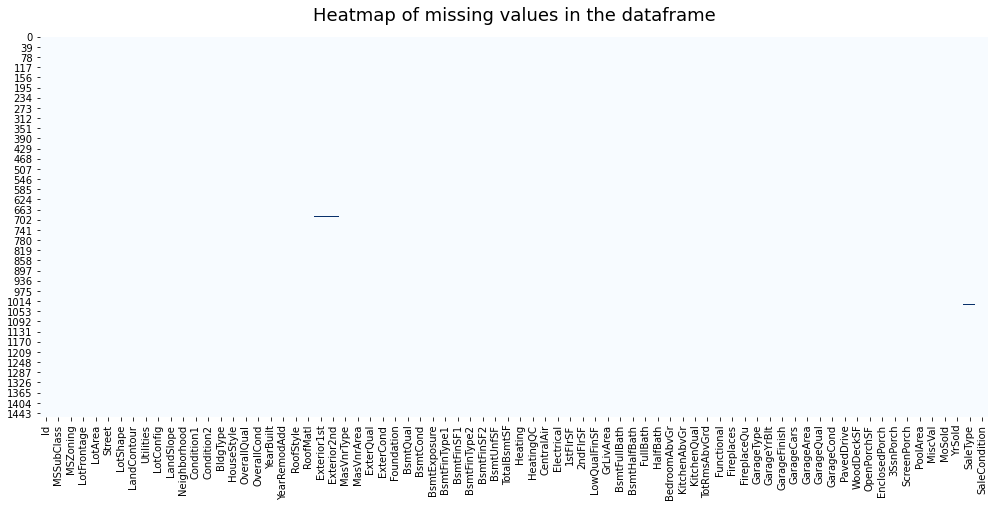

In [33]:
dataframe.show_map_missing_values(house_prices_data)

In [34]:
house_prices_data.to_csv('house_prices_cleaned_test_data.csv')